In [1]:
#import os
#os.remove("./6_6train_predict_SV.csv")

In [2]:
!pip install -q pycaret openpyxl #for model selection library, read excel

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.3 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.17.3 which is incompatible.


In [3]:
# import useful packages
import numpy as np # linear algebra
import pandas as pd # data processing 

pd.set_option('max_columns', None) # exapnd column width
pd.set_option('max_rows',81) 

from sklearn.neighbors import KNeighborsRegressor #K&N for numeric missing values
import scipy.stats #Feature Transformation - will only apply for numeric features
from sklearn.preprocessing import StandardScaler 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from pycaret.regression import setup, compare_models #setup function will perform essential inferences about the data

#import models after comparison - can run different ones if needed 
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import KFold, cross_val_score #cross validation for models

In [4]:
shared_in_train = pd.read_excel('../input/shared-in-tsf/8_4 Train.xlsx')
shared_in_test = pd.read_excel('../input/shared-in-tsf/8_4 Test.xlsx')

In [5]:
shared_in_train

,Date,IsWeekday,IsHoliday,DayOfWeek,Year,Month,DayOfMonth,Shared_In_Vol
0,2018-01-01,1,1,2,2018,1,1,143
1,2018-01-02,1,0,3,2018,1,2,4049
2,2018-01-03,1,0,4,2018,1,3,4583
3,2018-01-04,1,0,5,2018,1,4,4689
4,2018-01-05,1,0,6,2018,1,5,4920
...,...,...,...,...,...,...,...,...
1334,2021-08-27,1,0,6,2021,8,27,26073
1335,2021-08-28,0,0,7,2021,8,28,5286
1336,2021-08-29,0,0,1,2021,8,29,3336
1337,2021-08-30,1,0,2,2021,8,30,30855


In [6]:
shared_in_test

,Date,IsWeekday,IsHoliday,DayOfWeek,Year,Month,DayOfMonth
0,2021-09-01,1,0,4,2021,9,1
1,2021-09-02,1,0,5,2021,9,2
2,2021-09-03,1,0,6,2021,9,3
3,2021-09-04,0,0,7,2021,9,4
4,2021-09-05,0,0,1,2021,9,5
5,2021-09-06,1,1,2,2021,9,6
6,2021-09-07,1,0,3,2021,9,7
7,2021-09-08,1,0,4,2021,9,8
8,2021-09-09,1,0,5,2021,9,9
9,2021-09-10,1,0,6,2021,9,10


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'IsWeekday'),
  Text(0, 1.5, 'IsHoliday'),
  Text(0, 2.5, 'DayOfWeek'),
  Text(0, 3.5, 'Year'),
  Text(0, 4.5, 'Month'),
  Text(0, 5.5, 'DayOfMonth'),
  Text(0, 6.5, 'Shared_In_Vol')])

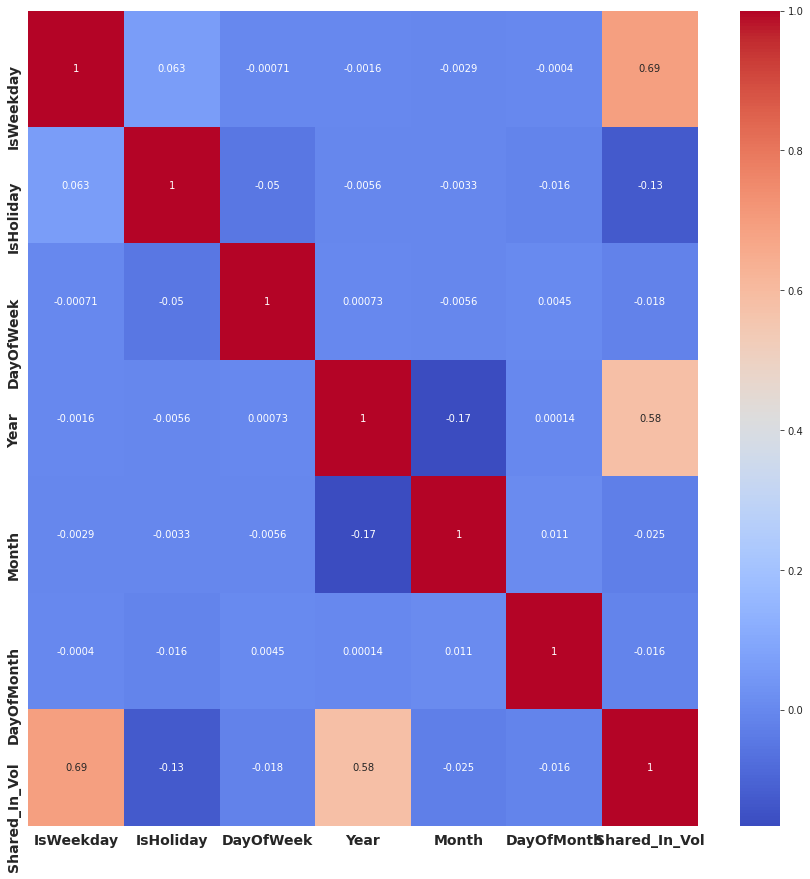

In [7]:
#use correlation heatmap viz to help see which features could be useful for a stronger correlation to salesprice:
#OverallQual / GrLvngArea / 

plt.figure(figsize=[15,15])
sns.heatmap(shared_in_train.corr(), annot = True,cmap = 'coolwarm')
plt.xticks(fontsize=14,weight = 'bold')
plt.yticks(fontsize=14,weight = 'bold')

In [8]:
#combine test and training set to get more valuable data for pre-processing.  Drop columns not needed before filling for NaN values 
target = shared_in_train['Shared_In_Vol']
test_dates = shared_in_test['Date']
train_dates = shared_in_train['Date']

train1 = shared_in_train.drop(['Date','Shared_In_Vol'], axis=1)
test1 = shared_in_test.drop (['Date'], axis=1)

data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
data1 #combined data

,IsWeekday,IsHoliday,DayOfWeek,Year,Month,DayOfMonth
0,1,1,2,2018,1,1
1,1,0,3,2018,1,2
2,1,0,4,2018,1,3
3,1,0,5,2018,1,4
4,1,0,6,2018,1,5
...,...,...,...,...,...,...
1456,1,0,2,2021,12,27
1457,1,0,3,2021,12,28
1458,1,0,4,2021,12,29
1459,1,0,5,2021,12,30


In [9]:
#look at missing values across all columns
data1.select_dtypes(np.number).isna().sum().sum()

0

In [10]:
data2 = data1.copy()

In [11]:
data2.dtypes

IsWeekday     int64
IsHoliday     int64
DayOfWeek     int64
Year          int64
Month         int64
DayOfMonth    int64
dtype: object

# Feature Scaling

In [12]:
#Research Scaling
#This centers all the columns at 0 with a variance of 1. 
#Prediction models work more effectively when all of the features can fit on one scale

scaler = StandardScaler()
scaler.fit(data2)
data3 = pd.DataFrame(scaler.transform(data2), index=data2.index, columns=data2.columns)

In [13]:
data2

,IsWeekday,IsHoliday,DayOfWeek,Year,Month,DayOfMonth
0,1,1,2,2018,1,1
1,1,0,3,2018,1,2
2,1,0,4,2018,1,3
3,1,0,5,2018,1,4
4,1,0,6,2018,1,5
...,...,...,...,...,...,...
1456,1,0,2,2021,12,27
1457,1,0,3,2021,12,28
1458,1,0,4,2021,12,29
1459,1,0,5,2021,12,30


In [14]:
data3

,IsWeekday,IsHoliday,DayOfWeek,Year,Month,DayOfMonth
0,0.630941,7.153920,-1.000857,-1.342315,-1.601451,-1.673805
1,0.630941,-0.139784,-0.500428,-1.342315,-1.601451,-1.560170
2,0.630941,-0.139784,0.000000,-1.342315,-1.601451,-1.446535
3,0.630941,-0.139784,0.500428,-1.342315,-1.601451,-1.332899
4,0.630941,-0.139784,1.000857,-1.342315,-1.601451,-1.219264
...,...,...,...,...,...,...
1456,0.630941,-0.139784,-1.000857,1.341702,1.588154,1.280710
1457,0.630941,-0.139784,-0.500428,1.341702,1.588154,1.394345
1458,0.630941,-0.139784,0.000000,1.341702,1.588154,1.507980
1459,0.630941,-0.139784,0.500428,1.341702,1.588154,1.621615


In [15]:
data4 = data3.copy()

# Target Transformation

In [16]:
#Check to make sure min target values are above 0 before trasnformation
np.min(target)

143

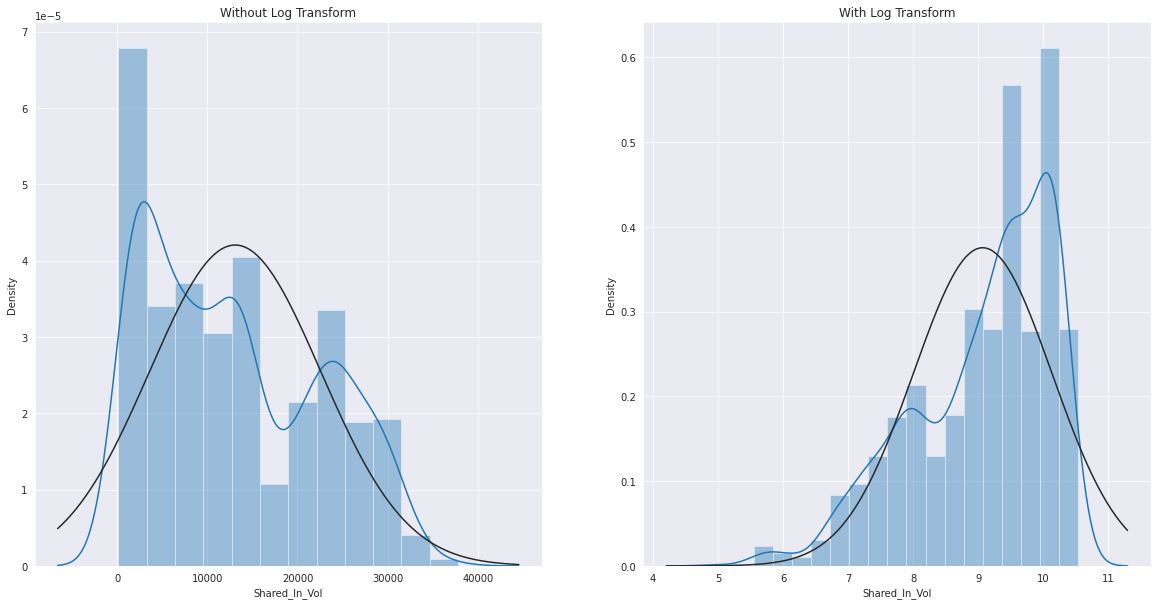

In [17]:
#Target unit tranformation has to be done seperate from feature transformation because when you trasnform the target you're essentially changing the unit 
#that the model is using for the predictions.. so if you want to analyze results be sure to undo your target trasnformations

#First look at how target data is distributed
#This chart will show how a normalized distribution will fit with the data
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit =scipy.stats.norm) #density estimator
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit =scipy.stats.norm) #density estimator
plt.title("With Log Transform")
plt.show()

In [18]:
#Since we've validated that we can better distribute our target data, we will apply the transformation below
log_target = np.log(target)
log_target

0        4.962845
1        8.306225
2        8.430109
3        8.452975
4        8.501064
          ...    
1334    10.168656
1335     8.572817
1336     8.112528
1337    10.337054
1338    10.329898
Name: Shared_In_Vol, Length: 1339, dtype: float64

# Split Data

In [19]:
#We'll want to split the data so we know which rows our model is using for the train & test version
#goal is to use the train set for the model and evaluate on the test set
train_final = data4.loc[:shared_in_train.index.max(),:].copy()
test_final = data4.loc[shared_in_train.index.max()+1:,].reset_index(drop = True).copy()

# Model Selection

In [20]:
#Data to run through model selection
pd.concat([train_final, log_target], axis=1)

,IsWeekday,IsHoliday,DayOfWeek,Year,Month,DayOfMonth,Shared_In_Vol
0,0.630941,7.153920,-1.000857,-1.342315,-1.601451,-1.673805,4.962845
1,0.630941,-0.139784,-0.500428,-1.342315,-1.601451,-1.560170,8.306225
2,0.630941,-0.139784,0.000000,-1.342315,-1.601451,-1.446535,8.430109
3,0.630941,-0.139784,0.500428,-1.342315,-1.601451,-1.332899,8.452975
4,0.630941,-0.139784,1.000857,-1.342315,-1.601451,-1.219264,8.501064
...,...,...,...,...,...,...,...
1334,0.630941,-0.139784,1.000857,1.341702,0.428297,1.280710,10.168656
1335,-1.584935,-0.139784,1.501285,1.341702,0.428297,1.394345,8.572817
1336,-1.584935,-0.139784,-1.501285,1.341702,0.428297,1.507980,8.112528
1337,0.630941,-0.139784,-1.000857,1.341702,0.428297,1.621615,10.337054


In [21]:
#setup function for model selection
#_ =setup(data=pd.concat([train_final, log_target], axis=1), target='Shared_In_Vol')

In [22]:
#compare_models()
#each model takes a different approach at solving the prediction most are regression models. Ideally looking for top reccomendation and lowest RMSE

# Baseline Model

In [23]:
#baseline_model = CatBoostRegressor(verbose=0)

In [24]:
#baseline_model.fit(train_final, log_target)

# Bagging Esemble

In [25]:
# training multiple models and combining the average predictions
models = {
    "catboost": CatBoostRegressor(verbose=0),
    "grb": GradientBoostingRegressor(),
    "xgboost": XGBRegressor(),
    "rf": RandomForestRegressor(),
    "et": ExtraTreesRegressor()
}

In [26]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + "trained.")

catboosttrained.
grbtrained.
xgboosttrained.
rftrained.
ettrained.


# Evaluate

In [27]:
#logic to cross validate prediction results against the train_final
#Will make 10 different splits, cross_val score will return results from each run --> results will contain a list of NMSE from the cross validations
results = {}
Kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=Kf)))
    results[name] = result

In [28]:
for name, result in results.items():
    print("---------\n" + name + "\n---------")
    print(np.mean(result))
    print(np.std(result))

---------
catboost
---------
1.2317930130502295
0.22222928317977092
---------
grb
---------
1.226959448816307
0.17260923395534608
---------
xgboost
---------
1.2532692337711624
0.18119383596397468
---------
rf
---------
1.244989519651864
0.1434870063094263
---------
et
---------
1.2354301739993905
0.1303634448375479


# Combine Predictions

In [29]:
final_predictions = (
0.20 * np.exp(models["catboost"].predict(test_final)) +
0.20 * np.exp(models["grb"].predict(test_final)) +
0.20 * np.exp(models["xgboost"].predict(test_final)) +
0.20 * np.exp(models["rf"].predict(test_final)) + 
0.20 * np.exp(models["et"].predict(test_final))
)

final_predictions

array([30996.10273736, 30468.16412203, 24445.46922928,  5320.97241843,
        3000.4575253 ,  4466.20456837, 31335.66978189, 30775.66724444,
       30255.34748041, 26576.93618623,  5263.91045929,  3476.0225745 ,
       31132.12044313, 31732.06557486, 30469.09027547, 29620.49871237,
       25838.47909192,  5009.47256151,  3310.30776761, 30838.12205085,
       31743.8556416 , 30824.83799728, 30434.41898691, 26226.12785398,
        5196.87227218,  3343.72916251, 30911.57772333, 30998.43015794,
       30270.40690228, 29508.46352262, 26857.66215433,  5437.58794019,
        3434.83389936, 28169.94944169, 26208.57738631, 30442.01856214,
       30282.41037323, 26239.24526313,  5339.04768036,  3503.38270938,
       30718.43770736, 31210.62497303, 30282.31560847, 29666.1752715 ,
       26003.91708644,  5075.37183839,  3444.88800392, 30912.04847634,
       31302.99845907, 30351.22327294, 29784.69628706, 25970.12988418,
        5248.66355991,  3481.86746473, 31503.39191797, 31473.61182261,
      

In [30]:
#get the mean sale price from model.  Do this by un-transforming the target metric 
#np.exp(np.sqrt(np.mean(results)))

<Figure size 1152x720 with 0 Axes>

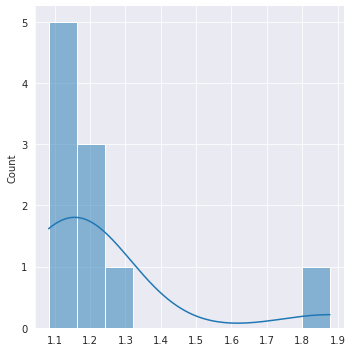

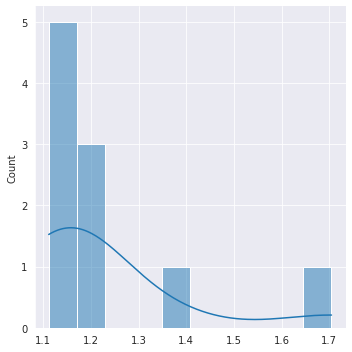

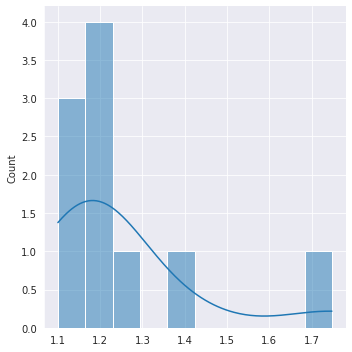

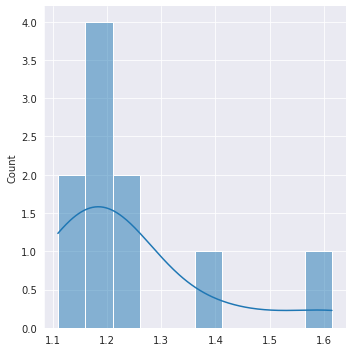

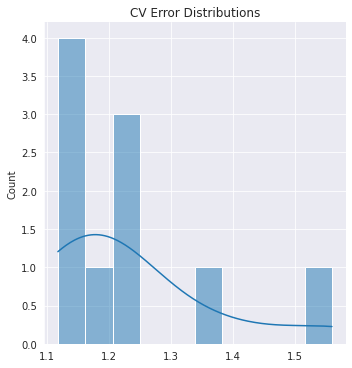

In [31]:
plt.figure(figsize=(16,10))

for name, model in models.items(): 
    sns.displot(results[name], bins=10, kde=True)
    
plt.title("CV Error Distributions")
plt.show()

           Date  Shared_In_Vol  Shared_In_Vol_Pred
0    2018-01-01            143          319.702448
1    2018-01-02           4049         4525.888555
2    2018-01-03           4583         5001.478692
3    2018-01-04           4689         5094.605962
4    2018-01-05           4920         5243.106255
...         ...            ...                 ...
1334 2021-08-27          26073        25732.310591
1335 2021-08-28           5286         5210.106475
1336 2021-08-29           3336         3338.758016
1337 2021-08-30          30855        30791.976307
1338 2021-08-31          30635        30570.560480

[1339 rows x 3 columns]


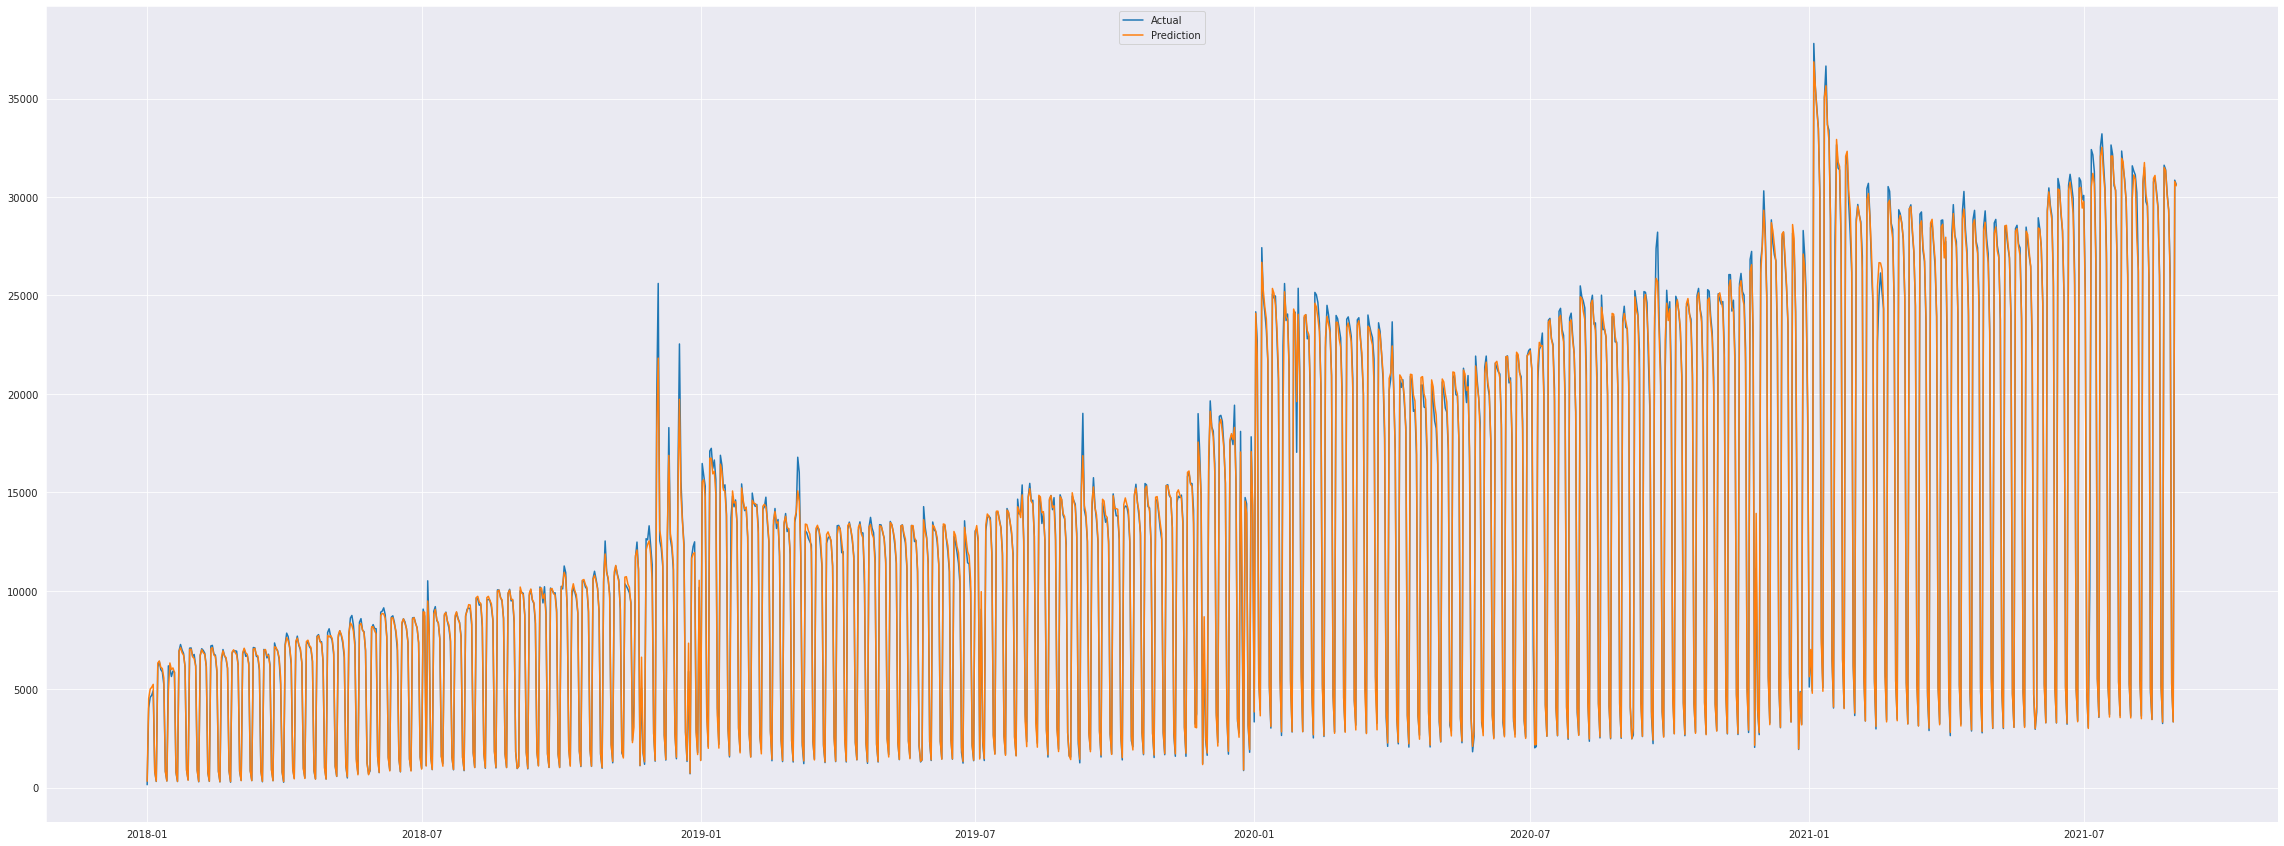

In [32]:
#Validate forecast model against training actuals

Train_Prediction = (
0.20 * np.exp(models["catboost"].predict(train_final)) +
0.20 * np.exp(models["grb"].predict(train_final)) +
0.20 * np.exp(models["xgboost"].predict(train_final)) +
0.20 * np.exp(models["rf"].predict(train_final)) + 
0.20 * np.exp(models["et"].predict(train_final))
) #remember to un-transform values for predictions

tp = pd.concat([train_dates,target,pd.Series(Train_Prediction, name = 'Shared_In_Vol_Pred')],axis=1)
#Initial model results look very good.  We have a RMSE *avg error against prediction & actuals* of 1.12 out of a very wide range of sales prices

print(tp)

plt.figure(figsize=(40,15))

x = tp.Date
y = tp.Shared_In_Vol

x2 = tp.Date
y2 = tp.Shared_In_Vol_Pred

plt.plot(x, y, label='Actual')
plt.plot(x2, y2, label='Prediction')
plt.legend(loc='upper center')

In [33]:
#tp.to_csv('./6_6train_predict_SV.csv',index=False, header=True)

In [34]:
test_final2 = pd.concat([test_dates, pd.Series(final_predictions, name = 'Shared_In_Vol')], axis=1)

In [35]:
test_final2.to_csv('./8_4test_final_CM.csv',index=False, header=True)